**Assignment 1: Image formation**

*CPSC 480/580: Computer Vision*

*Yale University*

*Instructor: Alex Wong*

**Prerequisites**:

1. Assuming you have set up a directory structure of
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Assignments
```

2. Prior to starting this assignment, please create a directory called 'data' within your 'Assignments' directory and within 'data' create a directory called 'assignment_01', i.e.
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Assignments/data/assignment_01
```

3. Download the following files and upload them to assignment_01 directory:
```
RGB intensities: https://drive.google.com/file/d/1-By3ngwjHpebkFb8aZMsIb5PSN32qS2H/view?usp=drive_link
3D point cloud: https://drive.google.com/file/d/1-0JIiKZ1I19aptB-HzPQUrrb5tEAgQxf/view?usp=drive_link
Camera intrinsics: https://drive.google.com/file/d/1-RlrXMXyKrpYEPflnpV-TiTltKXpVYxH/view?usp=drive_link
```

Mount Google Drive onto Google Colab

In [ ]:
from google.colab import drive
from google.colab import auth
from google.auth import default
import os

drive.mount('/content/drive/', force_remount=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Assignments')

Mounted at /content/drive/


Import packages

In [ ]:
import os, cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from PIL import Image

Global constants

In [ ]:
# Shape of target image, necessary for projection
SHAPE_IMAGE = [375, 1242, 3]

# Colormap for visualizing depth
DEPTH_COLORMAP = cm.get_cmap(name='jet')
DEPTH_COLORMAP.set_under(color='black')

<ipython-input-3-39f17f69ac16>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  DEPTH_COLORMAP = cm.get_cmap(name='jet')


Utility functions for plotting

In [ ]:
def config_plot():
    '''
    Function to remove axis tickers and box around figure
    '''

    plt.box(False)
    plt.axis('off')

In [ ]:
def plot_rgb_to_image(rgb_values, xy_coordinates, image):
    '''
    Plots RGB values onto the image plane

    TODO: Plots RGB values onto the image plane

    Arg(s):
        rgb_values : numpy[float32]
            3 x N RGB values
        xy_coordinates : numpy[float32]
            2 x N coordinates corresponding to target image to be plotted
        image : numpy[float32]
            h x w x 3 image to be populated
    Returns:
        numpy[float32] : RGB image
    '''
    # TODO: For every point, plot RGB colors onto the image only if they are within the image plane
    for i in range(xy_coordinates.shape[1]):
      # TODO: Quantize image coordinates as integers
      x = xy_coordinates[0, i].astype(int)
      y = xy_coordinates[1, i].astype(int)

      if (x < image.shape[1] and y < image.shape[0] and x >= 0 and y >= 0):
        image[y,x] = rgb_values[:, i]

    # TODO: Convert image to uint8 for display purposes i.e. image \in [0, 1] if float and image \in [0, 255] if uint8
    image = np.clip(image, 0, 255).astype(np.uint8)

    return image



In [ ]:
def plot_depth_to_image(depth_values, xy_coordinates, image):
    '''
    Plots depth values onto the image plane

    TODO: Plots depth values larger than 0 onto the image plane

    Arg(s):
        depth_values : numpy[float32]
            N depth values
        xy_coordinates : numpy[float32]
            2 x N coordinates corresponding to target image to be plotted
        image : numpy[float32]
            h x w image to be populated
    Returns:
        numpy[float32] : depth map
    '''

    # TODO: Quantize image coordinates as integers

    # TODO: For every point, plot depth value onto the image only if they are within the image plane and greater than 0
    for i in range(xy_coordinates.shape[1]):
      # TODO: Quantize image coordinates as integers
      x = xy_coordinates[0, i].astype(int)
      y = xy_coordinates[1, i].astype(int)

      if (x < image.shape[1] and y < image.shape[0] and x >= 0 and y >= 0):
        image[y,x] = depth_values[i]

    return image

Load RGB, XYZ and intrinsics data

In [ ]:
from numpy.core.multiarray import ndarray
# TODO: Load RGB values from numpy array as unsigned 8 bit integer
rgb = np.load("data/assignment_01/rgb_00001.npy").astype(np.uint8)

# TODO: Load XYZ coordinates (point cloud) from numpy array
xyz = np.load("data/assignment_01/xyz_00001.npy")

# Print shape of RGB and XYZ arrays
print('Shape of RGB values: {}'.format(rgb.shape))
print('Shape of XYZ coordinates: {}'.format(xyz.shape))

# TODO: Load intrinsics text file as numpy array
intrinsics = np.loadtxt("data/assignment_01/intrinsics.txt")

# Print the shape of intrinsics and its values
print('Shape of intrinsics: {}'.format(intrinsics.shape))
print('K: \n{}'.format(intrinsics))

# TODO: Create the intrinsics matrix
K = np.array([[intrinsics[0], 0, intrinsics[2]],
 [0, intrinsics[1], intrinsics[3]],
  [0, 0, 1]])

# Print the shape of the intrinsics matrix and its values
print('Shape of intrinsics: {}'.format(K.shape))
print('K: \n{}'.format(K))

Shape of RGB values: (3, 465750)
Shape of XYZ coordinates: (3, 465750)
Shape of intrinsics: (4,)
K: 
[725.0087 725.0087 620.5    187.    ]
Shape of intrinsics: (3, 3)
K: 
[[725.0087   0.     620.5   ]
 [  0.     725.0087 187.    ]
 [  0.       0.       1.    ]]


Project XYZ onto the image plane

In [ ]:
# Get number of points in point cloud
n_point = xyz.shape[1]

# TODO: Convert XYZ to homogenous form
xyz_h = np.row_stack([xyz, np.ones(xyz.shape[1])])

print('Shape of homogeneous XYZ: {}'.format(xyz_h.shape))

# TODO: Convert intrinsics to a 3 x 4
K0 = np.column_stack([K, [0, 0, 0]])

# Print the shape of the intrinsics matrix and its values
print('Shape of homogeneous K|0: {}'.format(K0.shape))
print('K|0: \n{}'.format(K0))

# TODO: Transform XYZ to image coordinate system
points_image = np.dot(K0, xyz_h)

print('Shape of points in image coordinates: {}'.format(points_image.shape))

# TODO: Project the points onto the image plane and convert to inhomogenous form
xy = np.zeros((points_image.shape[0] - 1, points_image.shape[1]))
for pointIndex in range(0, points_image.shape[1]):
  xy[0, pointIndex] = points_image[0, pointIndex]/points_image[2, pointIndex]
  xy[1, pointIndex] = points_image[1, pointIndex]/points_image[2, pointIndex]

# Print shape of image coordinates
print('Shape of image coordinates: {}'.format(xy.shape))

Shape of homogeneous XYZ: (4, 465750)
Shape of homogeneous K|0: (3, 4)
K|0: 
[[725.0087   0.     620.5      0.    ]
 [  0.     725.0087 187.       0.    ]
 [  0.       0.       1.       0.    ]]
Shape of points in image coordinates: (3, 465750)
Shape of image coordinates: (2, 465750)


Create image from image coordinates and RGB values

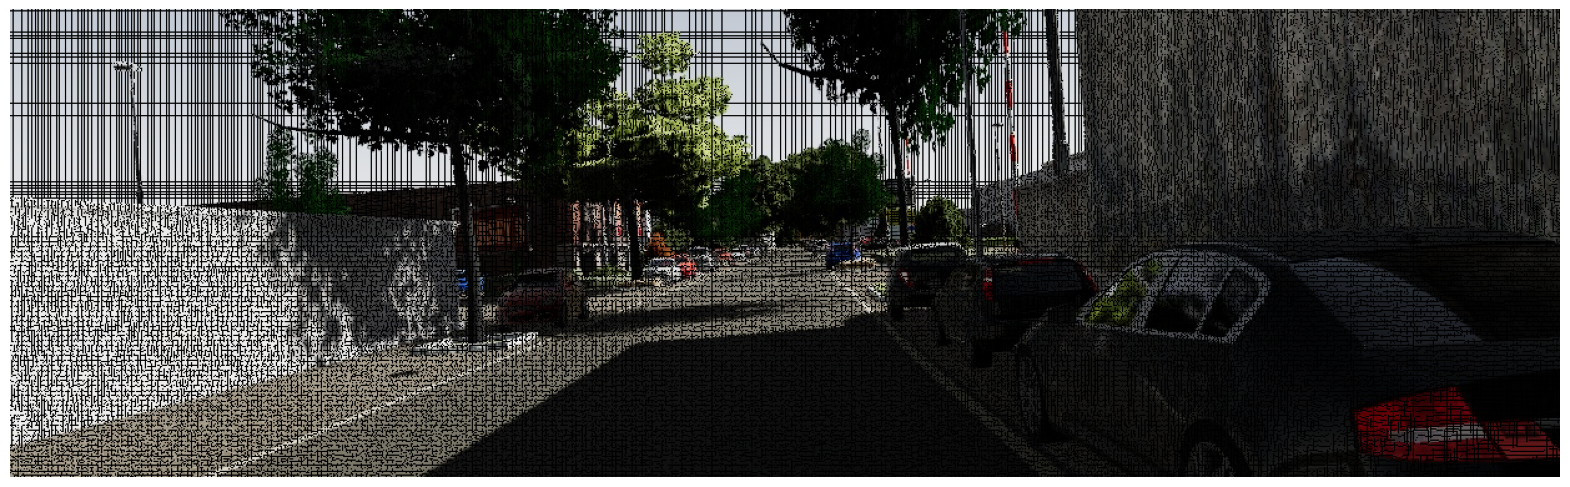

In [ ]:
# TODO: Define array of zeros with image shape
image = np.zeros(SHAPE_IMAGE, dtype=np.float32)

# TODO: Plot RGB values onto the image plane
image = plot_rgb_to_image(rgb, xy, image)

# TODO: Plot image with figure size of 20 by 20
# Note: be sure to remove axis tickers
fig = plt.figure(figsize = (20, 20))

ax = fig.add_subplot(1, 1, 1)
config_plot()

ax.imshow(image)
plt.show()


Project onto the image with full rank intrinsics matrix

Shape of points in image coordinates: (4, 465750)
Shape of depth map: (375, 1242)
Min and max values of depth map: (0.0, 655.35)


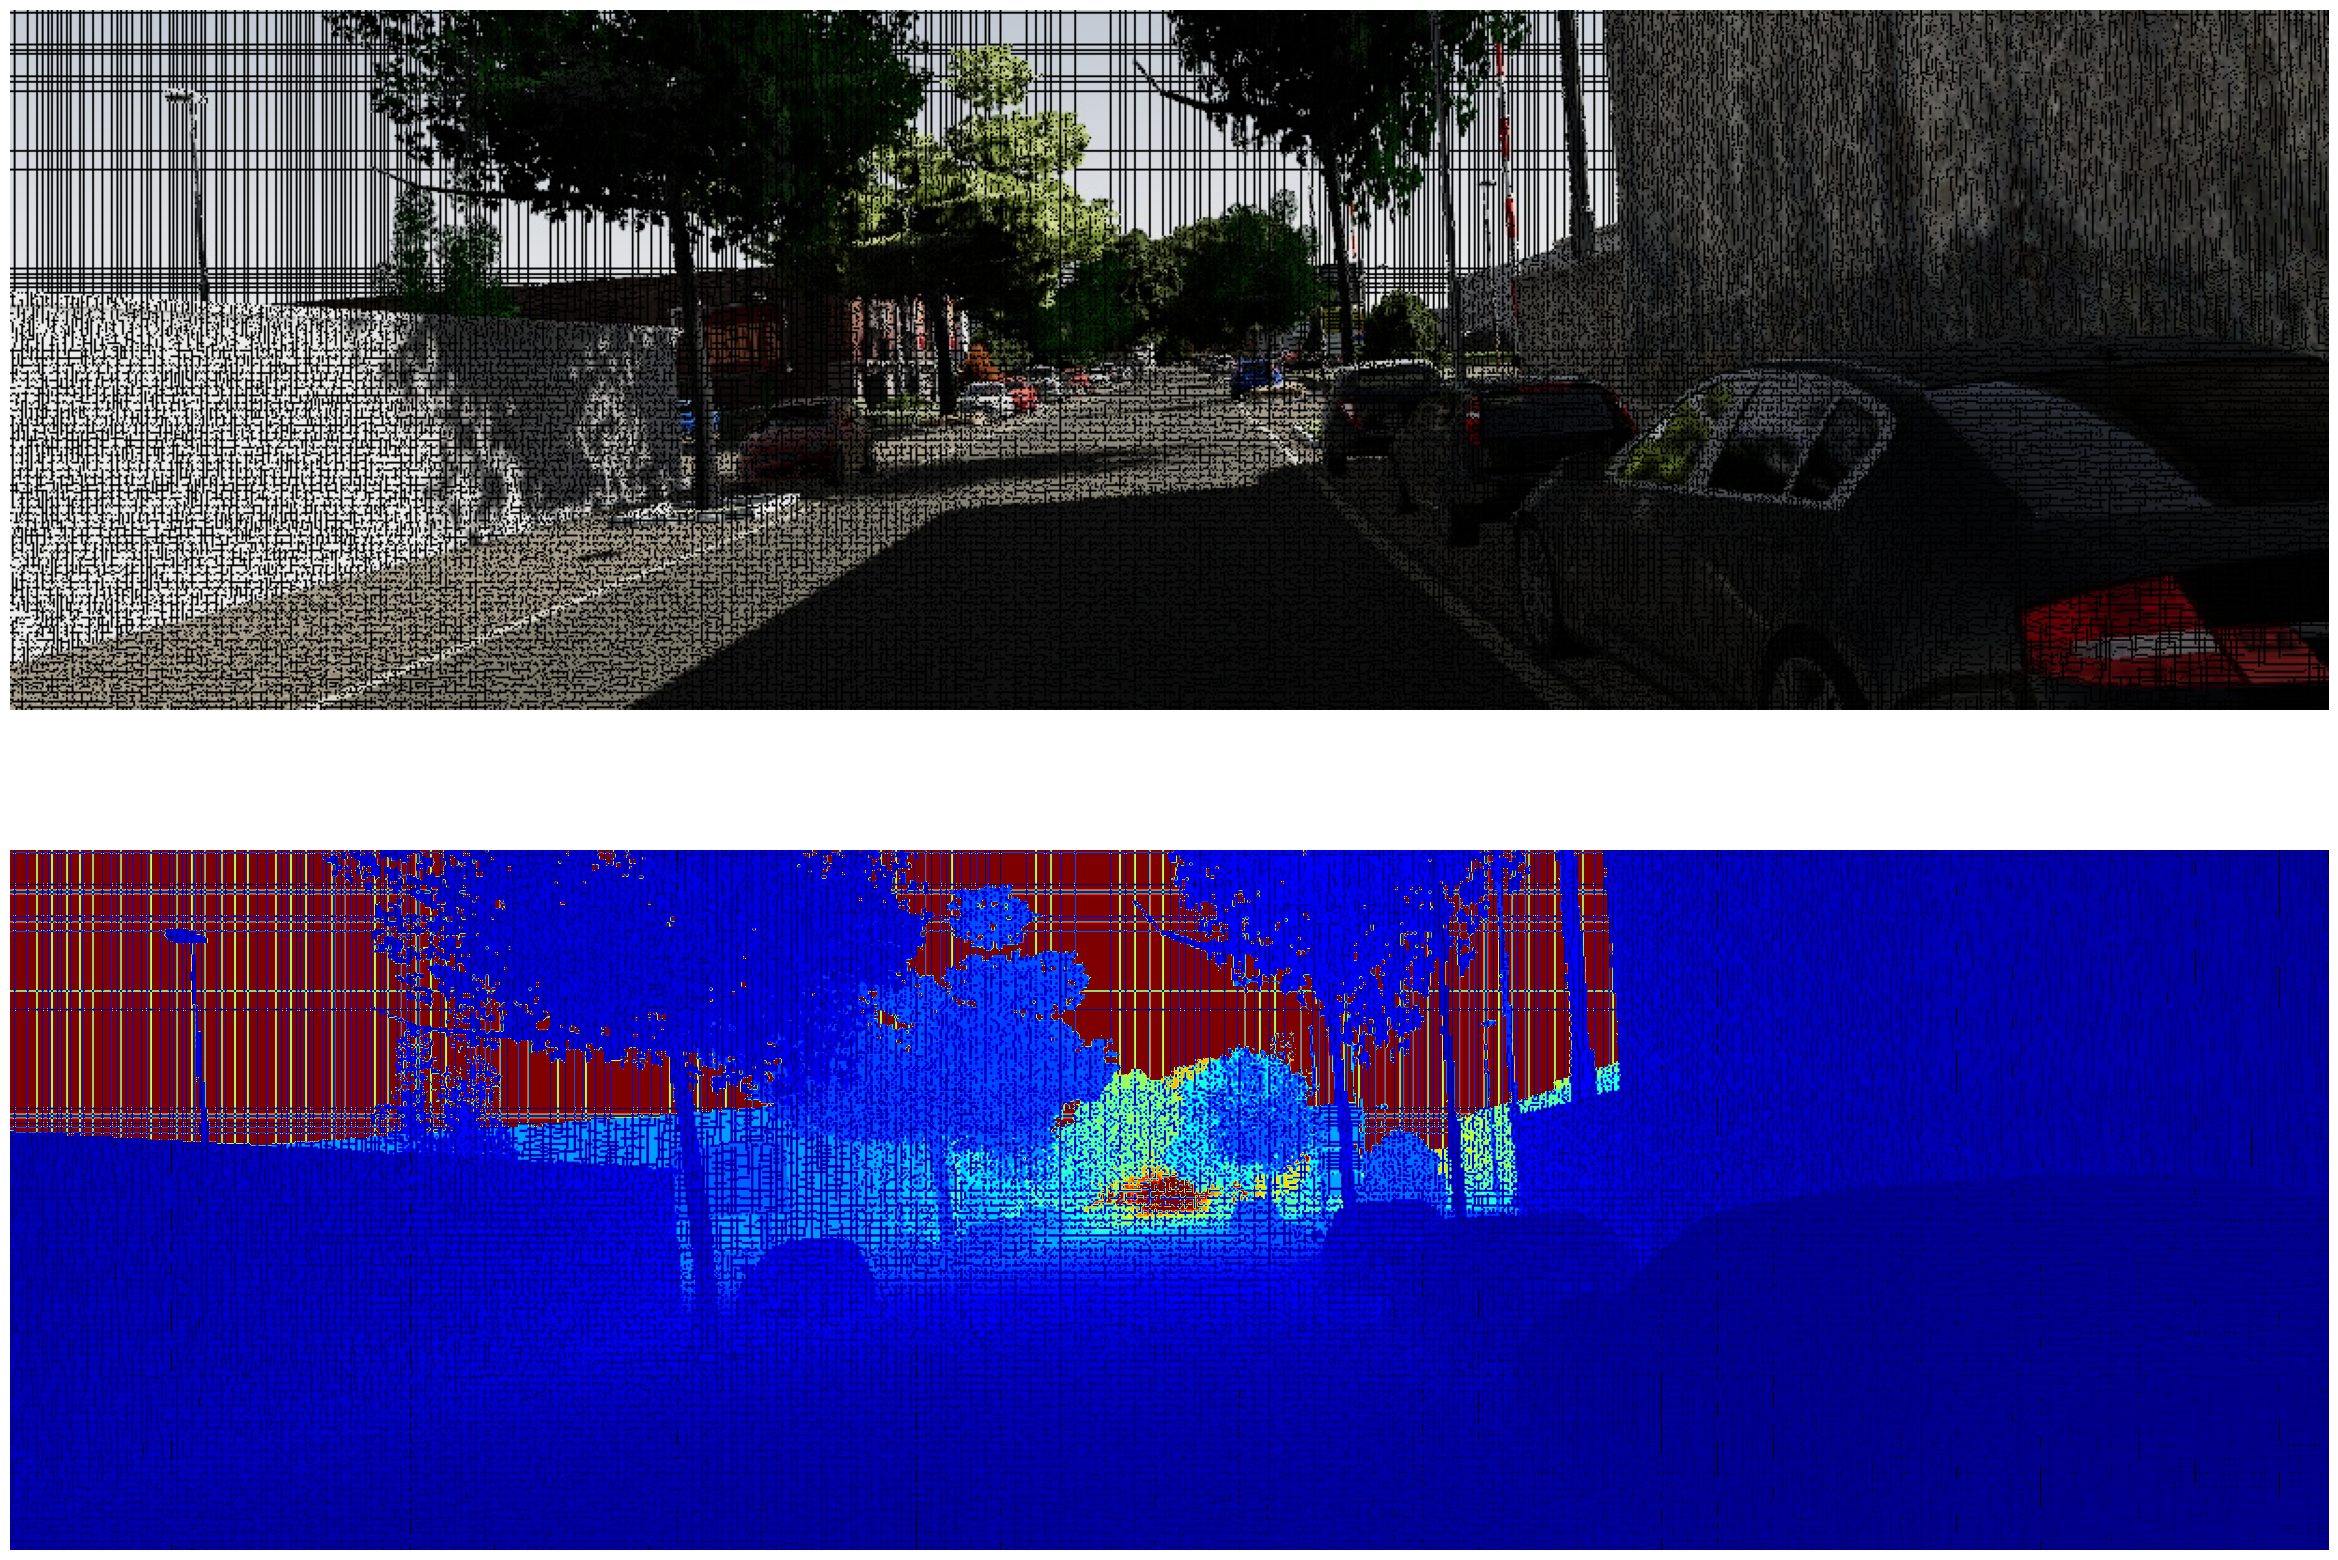

In [ ]:
# TODO: Create homogeneous intrinsics matrix
K_h = np.concatenate([K0, [[0, 0, 0, 1]]], axis=0)

# TODO: Transform homogeneous XYZ to image coordinate system using homogeneous intrinsics matrix
points_image_h = np.dot(K_h, xyz_h)

# Print shape of points in image coordinates
print('Shape of points in image coordinates: {}'.format(points_image_h.shape))

# TODO: Project the points onto the image plane
points_projected_h = np.zeros((points_image_h.shape[0] - 1, points_image_h.shape[1]))
for pointIndex in range(0, points_image_h.shape[1]):
  points_projected_h[0, pointIndex] = points_image_h[0, pointIndex]/points_image_h[2, pointIndex]
  points_projected_h[1, pointIndex] = points_image_h[1, pointIndex]/points_image_h[2, pointIndex]

# TODO: Extract depth from homogeneous coordinates
xy = points_projected_h
z = points_image_h[2]

# TODO: Create an empty image to be used to store depth values (depth map)
depth_map = np.zeros((SHAPE_IMAGE[0], SHAPE_IMAGE[1]))

# TODO: Plot depth values onto the image plane as a depth map
depth_map = plot_depth_to_image(z, xy, depth_map)

# Print shape of depth map
print('Shape of depth map: {}'.format(depth_map.shape))
print('Min and max values of depth map: {}'.format((np.min(depth_map), np.max(depth_map))))

# TODO: Plot a 2 by 1 figure with figure size of 30 by 20 for the image and
# the depth map using depth colormap defined as global constant and vmin=1e-3 and vmax=200
# Note: be sure to remove axis tickers
fig = plt.figure(figsize = (30, 20))

ax1 = fig.add_subplot(2, 1, 1)
config_plot()
ax2 = fig.add_subplot(2, 1, 2)
config_plot()

ax1.imshow(image)
ax2.imshow(depth_map, cmap = DEPTH_COLORMAP, vmin = 1e-3, vmax = 200)

plt.show()

Applying point cloud transformations

Shape of points in image coordinates: (3, 465750)
Shape of image coordinates: (2, 465750)
Shape of depth map: (375, 1242)
Min and max values of depth map: (0.0, 855.3670634016803)


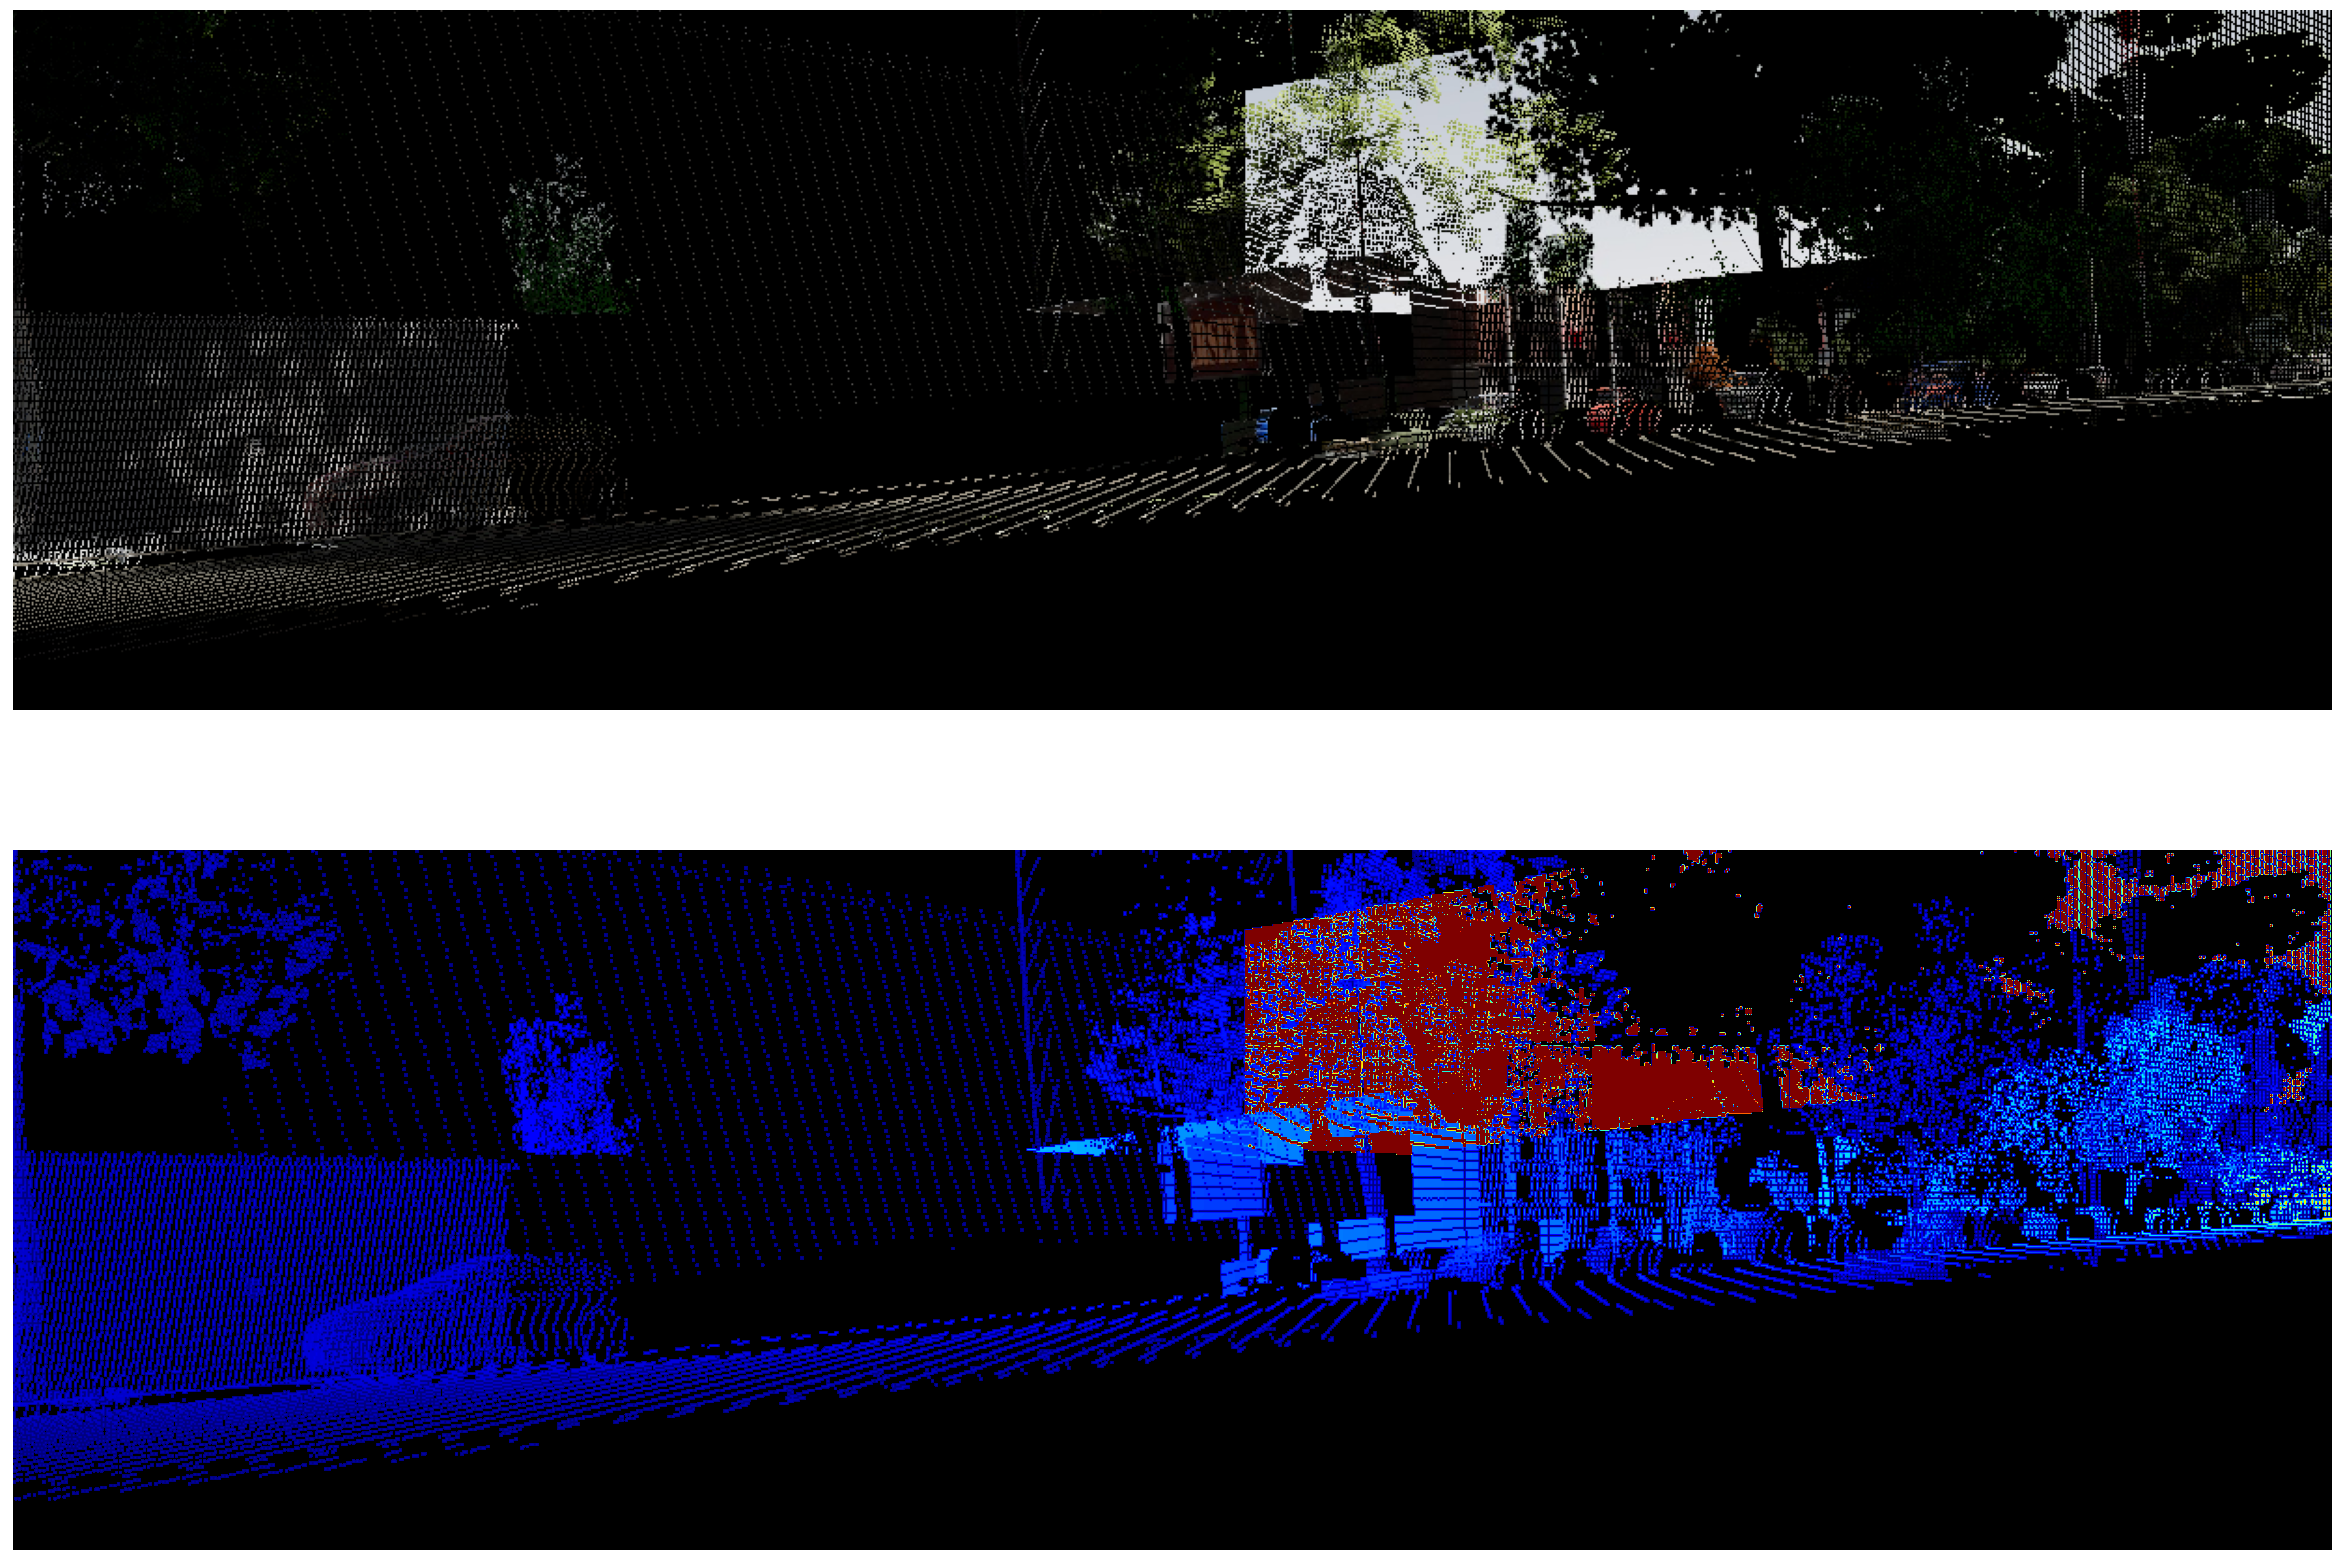

In [ ]:
# TODO: Create a 3d rotation matrix for 10 degrees about the y axis
# to be applied to point cloud

y_axis_deg =

rotation_matrix_y_h = np.array([[np.cos(y_axis_deg * np.pi/180), 0, np.sin(y_axis_deg* np.pi/180), 0],
                                [0, 1, 0, 0],
                                [-np.sin(y_axis_deg * np.pi/180), 0, np.cos(y_axis_deg * np.pi/180), 1],
                                [0, 0, 0, 1]])

# TODO: Create a translation matrix to move the point cloud closer by 5 units
translation_matrix_h = np.array([-20, 0, -5, 0])

# TODO: Apply the transformation so we look at the point cloud from a different view

#Rotate first
points_transformed_h = np.dot(rotation_matrix_y_h, xyz_h)

#Translate
for index in range(0, points_transformed_h.shape[1]):
  points_transformed_h[0, index] += translation_matrix_h[0]
  points_transformed_h[1, index] += translation_matrix_h[1]
  points_transformed_h[2, index] += translation_matrix_h[2]
  points_transformed_h[3, index] += translation_matrix_h[3]

# TODO: Transform homogeneous XYZ to image coordinate system using homogeneous intrinsics matrix
points_image_h = np.dot(K0, points_transformed_h)

# Print shape of points in image coordinates
print('Shape of points in image coordinates: {}'.format(points_image_h.shape))

# TODO: Project the points onto the image plane
points_projected_h = np.zeros((points_image_h.shape[0] - 1, points_image_h.shape[1]))
for pointIndex in range(0, points_image_h.shape[1]):
  points_projected_h[0, pointIndex] = points_image_h[0, pointIndex]/points_image_h[2, pointIndex]
  points_projected_h[1, pointIndex] = points_image_h[1, pointIndex]/points_image_h[2, pointIndex]

# Print shape of image coordinates
print('Shape of image coordinates: {}'.format(points_projected_h.shape))

# TODO: Extract depth from homogeneous coordinates
xy = points_projected_h
z = points_image_h[2]

# TODO: Define array of zeros with image shape
image = np.zeros(SHAPE_IMAGE)

# TODO: Plot RGB values onto the image plane
image = plot_rgb_to_image(rgb, xy, image)

# TODO: Create an empty image to be used to store depth values (depth map)
depth_map = np.zeros((SHAPE_IMAGE[0], SHAPE_IMAGE[1]))

# TODO: Plot depth values onto the image plane as a depth map
depth_map = plot_depth_to_image(z, xy, depth_map)

# Print shape of depth map
print('Shape of depth map: {}'.format(depth_map.shape))
print('Min and max values of depth map: {}'.format((np.min(depth_map), np.max(depth_map))))

# TODO: Plot a 2 by 1 figure with figure size of 30 by 20 for the image and
# the depth map using depth colormap defined as global constant and vmin=1e-3 and vmax=200
# Note: be sure to remove axis tickers
fig = plt.figure(figsize = (30, 20))
config_plot()

ax1 = fig.add_subplot(2, 1, 1)
config_plot()
ax2 = fig.add_subplot(2, 1, 2)
config_plot()

ax1.imshow(image)
ax2.imshow(depth_map, cmap = DEPTH_COLORMAP, vmin = 1e-3, vmax = 200)

plt.show()